In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

holandes = pd.read_csv("Holandes.csv")
portugues = pd.read_csv("Portugues.csv")

warnings.filterwarnings("ignore")

### Gols por jogo

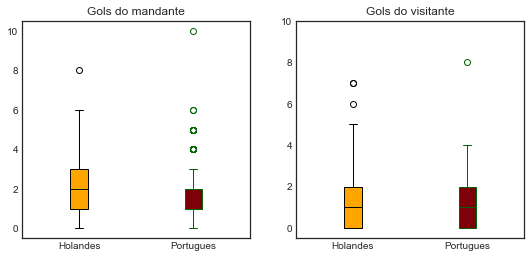

In [156]:
plt.style.use('seaborn-white')

gols_dentro = [holandes.FTHG, portugues.FTHG]
gols_fora = [holandes.FTAG, portugues.FTAG]
cores = ["orange", "black"]
legendas = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

for i in range(2):
    graf1.boxplot(gols_dentro[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    
    graf2.boxplot(gols_fora[i], patch_artist = True, positions = [i + 1], 
                               boxprops = dict(facecolor = cores[i], color = cores[i + 1]),
                               capprops = dict(color = cores[i + 1]),
                               whiskerprops = dict(color = cores[i + 1]),
                               flierprops = dict(color = cores[i + 1], markeredgecolor = cores[i + 1]),
                               medianprops = dict(color = cores[i + 1]))
    if i == 0:
        cores[1] = "#7E0008"
        cores.append("#006400")

graf1.set_title('Gols do mandante')
graf2.set_title('Gols do visitante')
graf1.set_xticklabels(['Holandes', 'Portugues'])
graf2.set_xticklabels(['Holandes', 'Portugues'])
plt.ylim(-0.5, 10)

plt.show()

In [36]:
gols = {'holandes_casa':holandes.FTHG, 'portugues_casa':portugues.FTHG,
        'holandes_fora':holandes.FTAG, 'portugues_fora':portugues.FTAG}

FTHG = pd.DataFrame(data = gols)

FTHG.describe()

,holandes_casa,portugues_casa,holandes_fora,portugues_fora
count,306.000000,306.000000,306.000000,306.000000
mean,2.006536,1.522876,1.460784,1.176471
std,1.584750,1.412288,1.416564,1.168536
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000
max,8.000000,10.000000,7.000000,8.000000


Com esses gráficos e as medidas, podemos perceber diversos pontos:

1 - Em ambos os campeonatos, o time que joga em casa costuma marcar mais gols. Isso é evidenciado pelo 1º quartil que é de 1 gol nos mandantes dos dois campeonatos, e 0 gols para os visitantes.

2 - O campeonato holandês teve média superior de gols tanto para quem joga em casa e quem joga fora, embora o português tenha bem mais valores extremos.

3 - De maneira geral, os times holandeses que jogam em casa fazem mais gols, como evidenciado por todos os quartis e média.

4 - Os desvios padrões são bem próximos uns dos outros, com exceção dos times visitantes de Portugal que tende a ser mais consistente com a média que os demais.

### Empates com gols

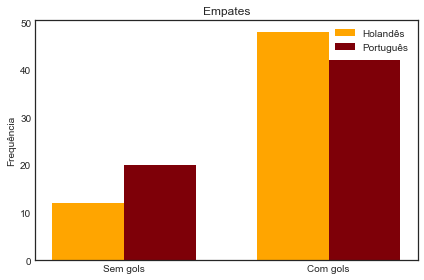

In [155]:
empates_hd = holandes[holandes.FTHG == holandes.FTAG]
empates_pt = portugues[portugues.FTHG == portugues.FTAG]

empates_hd.reset_index(inplace = True, drop = True)
empates_pt.reset_index(inplace = True, drop = True)

com_gols_hd = 0
com_gols_pt = 0


for jogo in range(len(empates_hd)):
    if empates_hd.FTHG[jogo] != 0:
        com_gols_hd += 1



for jogo in range(len(empates_pt)):
    if empates_pt.FTHG[jogo] != 0:
        com_gols_pt += 1

legenda = ['Sem gols', 'Com gols']
hd = [len(empates_hd) - com_gols_hd, com_gols_hd]
pt = [len(empates_pt) - com_gols_pt, com_gols_pt]

x = np.arange(len(legenda))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hd, width, label = 'Holandês', color = "orange")
rects2 = ax.bar(x + width/2, pt, width, label = 'Português', color = "#7E0008")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequência')
ax.set_title('Empates')
ax.set_xticks(x)
ax.set_xticklabels(legenda)
ax.legend()

fig.tight_layout()

plt.show()

In [160]:
empt = {'holandes_empates':empates_hd.FTHG, 'portugues_empates':empates_pt.FTHG}

empates = pd.DataFrame(data = empt)

empates.describe()

,holandes_empates,portugues_empates
count,60.000000,62.000000
mean,1.266667,1.032258
std,0.989207,0.974557
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,1.750000
max,4.000000,4.000000


Podemos perceber as seguintes curiosidades:

1 - O número total de empates em ambas as ligas foi bem próximo, bem como o desvio padrão e o empate com maior número de gols.

2 - Como demonstrado pelo gráfico, média e 1º quartil, o campeonato holandês tem proporcionalmente bem mais empates com gols do que os times portugueses. Esse é um indício de que a Eredivisie seja mais competitiva e emocionante que a Primeira Liga.

### Chutes na partida

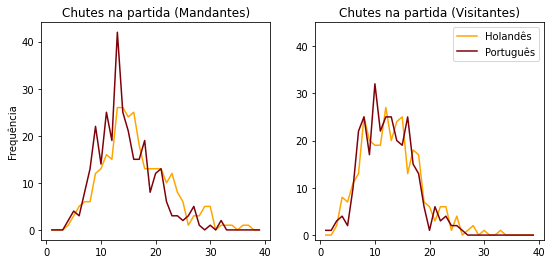

In [4]:
campeonatos = [holandes, portugues]
cores = ["orange", "#7E0008"]
legenda = ["Holandês", "Português"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

for i in range(len(campeonatos)):
    counts1, bins1 = np.histogram(campeonatos[i].HS, bins = range(0, 40, 1))
    counts2, bins2 = np.histogram(campeonatos[i].AS, bins = range(0, 40, 1))
    
    graf1.plot(bins1[:-1] + 1, counts1, color = cores[i], label = legenda[i])
    graf1.set_ylabel('Frequência')
    graf1.set_title('Chutes na partida (Mandantes)')
    
    graf2.plot(bins2[:-1] + 1, counts2, color = cores[i], label = legenda[i])
    graf2.set_title('Chutes na partida (Visitantes)')
    

plt.ylim(-1, 45)
plt.legend()

plt.show()

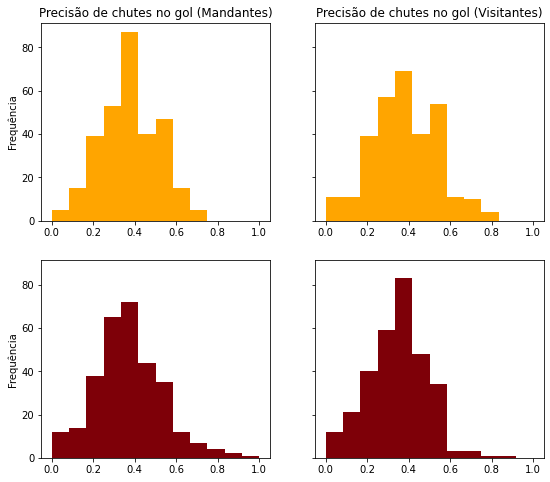

In [92]:
precisao_holandes_casa = []
precisao_portugues_casa = []

precisao_holandes_fora = []
precisao_portugues_fora = []


for i in range(len(holandes)):
    precisao_casa_hd = holandes.HST[i] / holandes.HS[i]
    precisao_casa_pt = portugues.HST[i] / portugues.HS[i]
    
    precisao_fora_hd = holandes.AST[i] / holandes.AS[i]
    precisao_fora_pt = portugues.AST[i] / portugues.AS[i]
    
    
    precisao_holandes_casa.append(precisao_casa_hd)
    precisao_portugues_casa.append(precisao_casa_pt)
    
    precisao_holandes_fora.append(precisao_fora_hd)
    precisao_portugues_fora.append(precisao_fora_pt)

    
    
precisoes_casa = [precisao_holandes_casa, precisao_portugues_casa]
precisoes_fora = [precisao_holandes_fora, precisao_portugues_fora]



fig, grafs = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 8), sharey = True)

bins = np.linspace(0, 1, 13)


grafs[0, 0].hist(precisao_holandes_casa, bins, rwidth = 1, color = "orange")
grafs[0, 1].hist(precisao_holandes_fora, bins, rwidth = 1, color = "orange")
grafs[1, 0].hist(precisao_portugues_casa, bins, rwidth = 1, color = "#7E0008")
grafs[1, 1].hist(precisao_portugues_fora, bins, rwidth = 1, color = "#7E0008")

grafs[0, 0].set_title("Precisão de chutes no gol (Mandantes)")
grafs[0, 1].set_title("Precisão de chutes no gol (Visitantes)")

grafs[0, 0].set_ylabel("Frequência")
grafs[1, 0].set_ylabel("Frequência")

plt.show()

### Resultado da partida

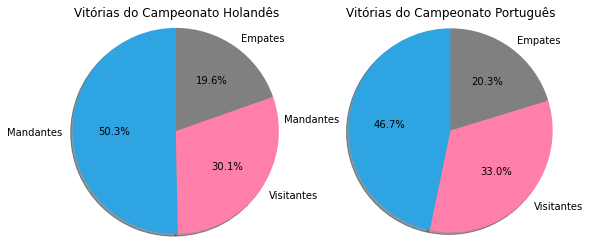

In [77]:
resultados_holandes = [sum(holandes.FTR == "H"), sum(holandes.FTR == "A"), sum(holandes.FTR == "D")]
resultados_portugues = [sum(portugues.FTR == "H"), sum(portugues.FTR == "A"), sum(portugues.FTR == "D")]
legenda = ["Mandantes", "Visitantes", "Empates"]
cores = ["#2FA4E2", "#FF7FAB", "gray"]

fig, (graf1, graf2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

graf1.pie(resultados_holandes, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)
graf2.pie(resultados_portugues, autopct='%1.1f%%', labels = legenda, shadow = True, startangle = 90, colors = cores)

graf1.axis('equal')
graf2.axis('equal')

graf1.set_title("Vitórias do Campeonato Holandês")
graf2.set_title("Vitórias do Campeonato Português")


plt.show()